# Working with geospatial data in Python

This little guide gives a brief intro to working with geospatial data in Python. The packages we'll be using have a ton of functionality and take time to get used to. For more information on these packages beyond this guide, here's the documentation for the two main packages we'll be using:

- [`pandas`](https://pandas.pydata.org/): Doing statistics and data science with tabular data in the form of "DataFrames."
- [`geopandas`](http://geopandas.org/): Adds geospatial support to pandas (adds the `geometry` column).

In [46]:
import geopandas
import matplotlib.pyplot as plt
import pandas
import numpy as np

## Reading in a file

In [47]:
df = geopandas.read_file("https://github.com/mggg-states/GA-shapefiles/raw/master/GA_precincts16.zip")

## Inspecting the data

A [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) holds tabular data in columns. Each column is a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series). Series are "list-like" while DataFrames are "dict-like".

We can see all the columns in our DataFrame `df`:

In [48]:
df.columns

Index(['ID', 'POPULATION', 'DISTRICT', 'PRECINCT_I', 'PRECINCT_N', 'CTYNAME',
       'FIPS1', 'FIPS2', 'PRES16D', 'PRES16R', 'PRES16L', 'SEN16D', 'SEN16R',
       'SEN16L', 'TOTPOP', 'NH_WHITE', 'NH_BLACK', 'NH_AMIN', 'NH_ASIAN',
       'NH_NHPI', 'NH_OTHER', 'NH_2MORE', 'HISP', 'H_WHITE', 'H_BLACK',
       'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE', 'VAP', 'HVAP',
       'WVAP', 'BVAP', 'AMINVAP', 'ASIANVAP', 'NHPIVAP', 'OTHERVAP',
       '2MOREVAP', 'CONDIST', 'HDIST', 'SENDIST', 'geometry'],
      dtype='object')

These are all the columns of the attribute table from our shapefile, plus a special `'geometry'` column holding the precinct geometries.

To see the first few rows of the table:

In [49]:
df.head()

,ID,POPULATION,DISTRICT,PRECINCT_I,PRECINCT_N,CTYNAME,FIPS1,FIPS2,PRES16D,PRES16R,...,BVAP,AMINVAP,ASIANVAP,NHPIVAP,OTHERVAP,2MOREVAP,CONDIST,HDIST,SENDIST,geometry
0,6094217,1013,073131,131,JOURNEY COMM. CHURCH,Columbia,13073,073,107,459,...,40,3,5,0,0,7,012,122,024,"POLYGON ((-82.14546199999999 33.57854, -82.145..."
1,6094266,3858,073064,064,GRACE BAPTIST CHURCH,Columbia,13073,073,767,1334,...,536,5,120,5,3,32,010,122,024,"POLYGON ((-82.16342400000001 33.574227, -82.16..."
2,6094297,1920,073061,061,GREENBRIER HIGH,Columbia,13073,073,387,1393,...,87,3,31,0,1,9,010,122,024,"POLYGON ((-82.16580999999999 33.564983, -82.16..."
3,6094341,1770,073063,063,RIVERSIDE ELEMENTARY,Columbia,13073,073,267,624,...,145,2,28,0,3,15,012,122,024,"POLYGON ((-82.139089 33.575924, -82.139141 33...."
4,6094377,3131,073132,132,WESLEY METHODIST,Columbia,13073,073,452,1377,...,197,10,109,3,1,21,012,122,024,"POLYGON ((-82.14330200000001 33.573481, -82.14..."


To select the `"TOTPOP"` column, `df` works like a dictionary mapping each column name to the Series holding the data:

In [50]:
df["TOTPOP"].head()

0    1013
1    3858
2    1920
3    1770
4    3131
Name: TOTPOP, dtype: int64

This notation also works:

In [51]:
df.TOTPOP.head()

0    1013
1    3858
2    1920
3    1770
4    3131
Name: TOTPOP, dtype: int64

Series objects have methods like `.sum()`, `.mean()`, `.min()`, `.max()`, `.nunique()` for doing math on the entire column. These methods are optimized using `numpy`, the Python package for scientific computing.

In [52]:
df["TOTPOP"].sum()

9687653

We can do math on the columns "element-wise". Here's how we might do that to compute the Hispanic population percentages of our precincts: 

In [53]:
hisp_pop_percent = df["HISP"] / df["TOTPOP"]

The `.describe()` method gives a statistical summary of the data in a Series:

In [54]:
hisp_pop_percent.describe()

count    2663.000000
mean        0.068441
std         0.091808
min         0.000000
25%         0.021412
50%         0.039425
75%         0.073319
max         0.739169
dtype: float64

## Inspecting geometries

The `geopandas` package adds geometry support to pandas, so we have a special "geometry" column holding the precinct geometries. Let's look at a couple precincts by indexing into the `geometry` Series:

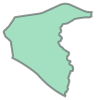

In [55]:
df.geometry[0]

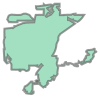

In [56]:
df.geometry[2450]

## Changing the projection

You can inspect the CRS (coordinate reference system) of the `geometry` column:

In [57]:
df.crs

{'init': 'epsg:4019'}

You can change the CRS too:

In [58]:
df = df.to_crs("+proj=utm +zone=16 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

If you're interested, see [EPSG.io](https://epsg.io/) and [Spatial Reference](https://spatialreference.org/) for more information on different coordinate systems.

## Plotting

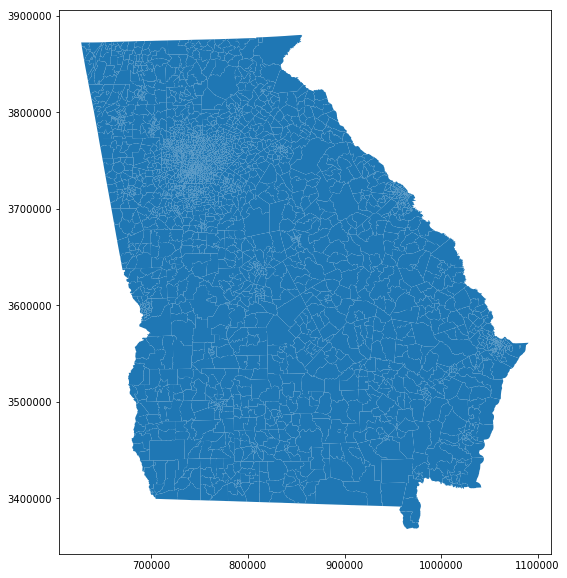

In [59]:
df.plot(figsize=(10, 10))

### Plotting a districting plan

For this shapefile, the `"SENDIST"` column holds the 

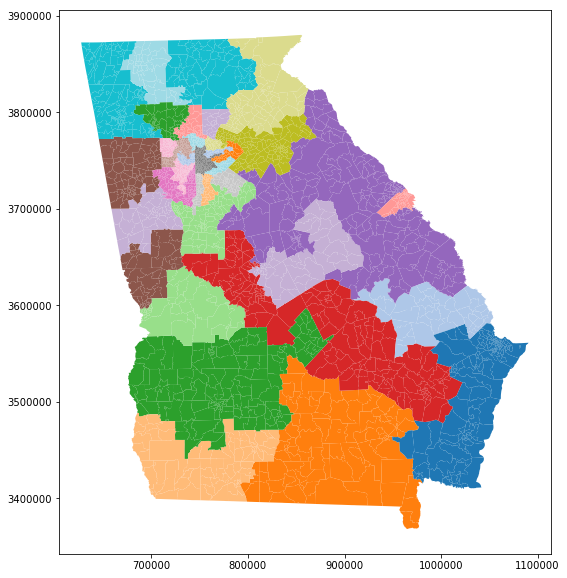

In [60]:
df.plot(column="SENDIST", figsize=(10, 10), cmap="tab20")

You can try this out with the other districting plan columns listed in the [README for this shapefile's MGGG States repo](https://github.com/mggg-states/GA-shapefiles).

Thanks to geopandas, `df.area` will give us a Series with the area of each precinct. We can use that to make a choropleth of population density:

In [63]:
df["POPDENSITY"] = (df["TOTPOP"] / df.area)

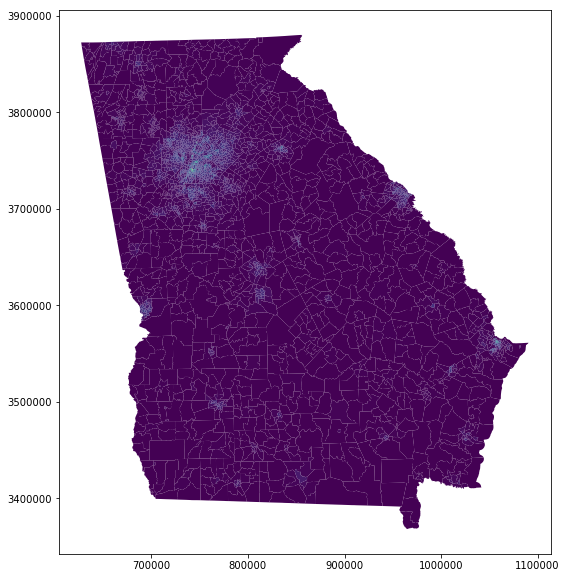

In [65]:
df.plot(column="POPDENSITY", figsize=(10, 10))